In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from shapely import Point
import matplotlib.patches as mpatches
%matplotlib inline
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':200})
sns.set_palette(sns.color_palette("colorblind"))

In [440]:
sns.color_palette("colorblind").as_hex()[1]

'#de8f05'

# "Training Curves" Attack

In [34]:
freemove_tfidf_refinement = pd.read_csv('results_recursive_search_freemove.csv')[['ARI', 'AMI']].rename(columns={'ARI':'ari', 'AMI':'ami'})
freemove_tfidf_refinement['data'] = 'freemove'
freemove_tfidf_refinement['step'] = 'tf_idf'

geolife_tfidf_refinement = pd.read_csv('results_recursive_search_geolife.csv')[['ARI', 'AMI']].rename(columns={'ARI':'ari', 'AMI':'ami'})
geolife_tfidf_refinement['data'] = 'geolife'
geolife_tfidf_refinement['step'] = 'tf_idf'

attack_metrics = pd.concat([pd.read_csv('attack_metrics.csv', sep=";"), freemove_tfidf_refinement.tail(1), geolife_tfidf_refinement.tail(1)])

Text(-0.3, 0.08, '0.07')

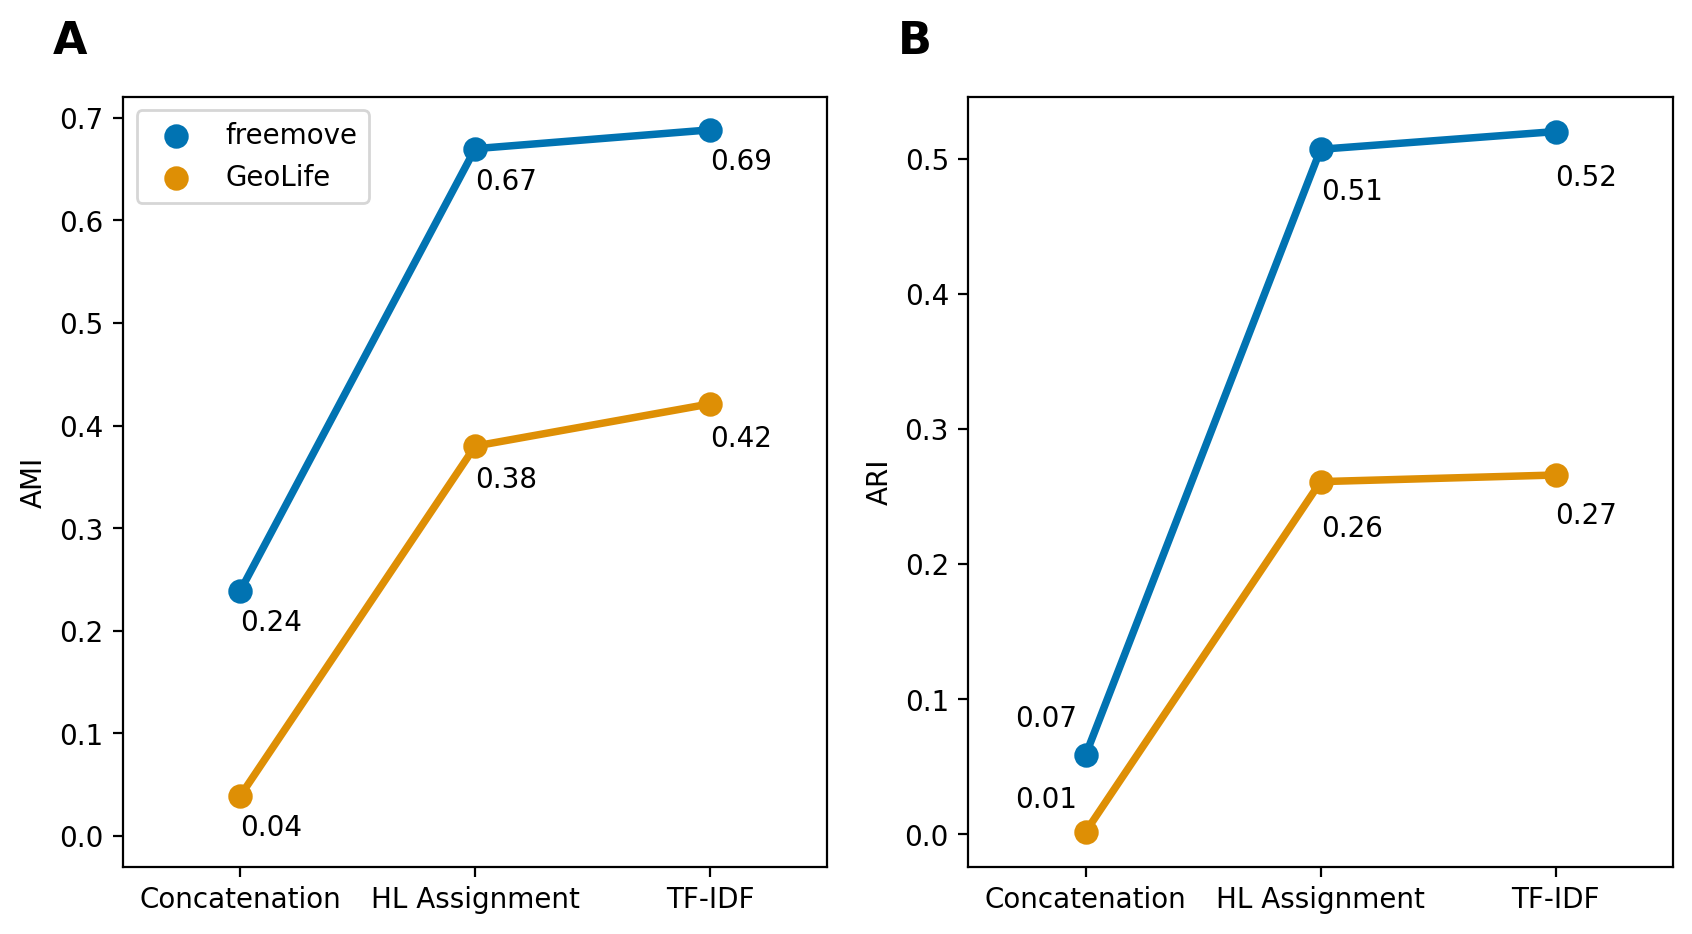

In [210]:
fig, (ax1, ax2) = plt.subplots(ncols=2)

ax1 = sns.pointplot(x="step", y="ami", data=attack_metrics, hue='data', ax=ax1)
ax2 = sns.pointplot(x="step", y="ari", data=attack_metrics, hue='data', ax=ax2)
        
ax2.legend([],[], frameon=False)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles, labels=['freemove', 'GeoLife'])


ax1.set_xlabel("")
ax2.set_xlabel("")
ax2.set_ylabel("ARI")
ax1.set_ylabel("AMI")

# Loop through each subplot and add labels
for i, ax in enumerate([ax1, ax2]):
    # Add the subplot label with bold font, aligned to the left, and only showing the letter
    ax.text(-0.1, 1.1, chr(65+i), transform=ax.transAxes, fontsize=16, fontweight='bold', ha='left', va='top')
    
ax1.set_xticklabels(['Concatenation', 'HL Assignment', 'TF-IDF'])
ax2.set_xticklabels(['Concatenation', 'HL Assignment', 'TF-IDF'])

ax1.set_ylim(-0.03)
ax2.set_xticklabels(['Concatenation', 'HL Assignment', 'TF-IDF'])

[ax1.text(p[0], p[1]-0.04, p[1], color='black') for p in zip(ax1.get_xticks(), np.round(attack_metrics.query("data=='freemove'").ami,2))]
[ax1.text(p[0], p[1]-0.04, p[1], color='black') for p in zip(ax1.get_xticks(), np.round(attack_metrics.query("data=='geolife'").ami,2))]

[ax2.text(p[0], p[1]-0.04, p[1], color='black') for p in zip(ax2.get_xticks()[1:], np.round(attack_metrics.query("data=='freemove'").ari,2)[1:])]
[ax2.text(p[0], p[1]-0.04, p[1], color='black') for p in zip(ax2.get_xticks()[1:], np.round(attack_metrics.query("data=='geolife'").ari,2)[1:])]

ax2.text(x=-0.3, y=np.round(attack_metrics.query("data=='geolife'").ari + 0.02,2).iloc[0], s=np.round(attack_metrics.query("data=='geolife'").ari + 0.01,2).iloc[0])
ax2.text(x=-0.3, y=np.round(attack_metrics.query("data=='freemove'").ari + 0.02,2).iloc[0], s=np.round(attack_metrics.query("data=='freemove'").ari + 0.01,2).iloc[0])

# Reidentification evaluation on raw data

In [399]:
pd.concat([pd.read_csv('freemove_nrp_1.csv'),
           pd.read_csv('freemove_nrp_4.csv'),
           pd.read_csv('freemove_nrp_10.csv'),
           pd.read_csv('freemove_private_nrp_1.csv'),
           pd.read_csv('freemove_private_nrp_4.csv'),
           pd.read_csv('freemove_private_nrp_10.csv'),
           pd.read_csv('freemove_500tessellation_nrp_1.csv'),
           pd.read_csv('freemove_500tessellation_nrp_4.csv'),
           pd.read_csv('freemove_500tessellation_nrp_10.csv'),
           pd.read_csv('freemove_private_500tessellation_nrp_1.csv'),
           pd.read_csv('freemove_private_500tessellation_nrp_4.csv'),
           pd.read_csv('freemove_private_500tessellation_nrp_10.csv'),
           pd.read_csv('geolife_nrp_1.csv'),
           pd.read_csv('geolife_nrp_4.csv'),
           pd.read_csv('geolife_nrp_10.csv'),
          pd.read_csv('geolife_private_nrp_1.csv'),
           pd.read_csv('geolife_private_nrp_4.csv'),
           pd.read_csv('geolife_private_nrp_10.csv'),
           pd.read_csv('geolife_500tessellation_nrp_1.csv'),
           pd.read_csv('geolife_500tessellation_nrp_4.csv'),
           pd.read_csv('geolife_500tessellation_nrp_10.csv'),
           pd.read_csv('geolife_private_500tessellation_nrp_1.csv'),
           pd.read_csv('geolife_private_500tessellation_nrp_4.csv'),
           pd.read_csv('geolife_private_500tessellation_nrp_10.csv')], 
          keys=['freemove',
                'freemove',
                'freemove',
                'freemove_private',
                'freemove_private',
                'freemove_private',
                'freemove_500tessellation',
                'freemove_500tessellation',
                'freemove_500tessellation',
                'freemove_private_500tessellation',
                'freemove_private_500tessellation',
                'freemove_private_500tessellation',
                'geolife',
                'geolife',
                'geolife',
               'geolife_private',
                'geolife_private',
                'geolife_private',
                'geolife_500tessellation',
                'geolife_500tessellation',
                'geolife_500tessellation',
                'geolife_private_500tessellation',
                'geolife_private_500tessellation',
                'geolife_private_500tessellation']).reset_index(0, names="data").reset_index(drop=True).to_csv('reident_scores.csv', index=False)
           

In [2]:
scores = pd.read_csv('reident_scores.csv')
scores['user_id'] = scores.user_id.astype(str)

In [3]:
scores

,data,user_id,precision,recall,pr_mean,f_score,nr_points,rand_entropy,ale,n_trips,hour_of_day,radius_of_gyration,fscore_user_mean,precision_user_mean,recall_user_mean
0,freemove,16348,1.000000,0.653846,0.826923,0.790698,1,3.906891,2.334572,26.0,13.807692,4.043032,0.642934,1.000000,0.525769
1,freemove,16348,1.000000,0.653846,0.826923,0.790698,1,3.906891,2.334572,26.0,13.807692,4.043032,0.642934,1.000000,0.525769
2,freemove,16348,1.000000,0.653846,0.826923,0.790698,1,3.906891,2.334572,26.0,13.807692,4.043032,0.642934,1.000000,0.525769
3,freemove,16348,1.000000,0.692308,0.846154,0.818182,1,3.906891,2.334572,26.0,13.807692,4.043032,0.642934,1.000000,0.525769
4,freemove,16348,1.000000,0.692308,0.846154,0.818182,1,3.906891,2.334572,26.0,13.807692,4.043032,0.642934,1.000000,0.525769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134595,geolife_private_500tessellation,179,0.133333,0.631579,0.382456,0.220183,10,NaN,NaN,NaN,NaN,NaN,0.414422,0.394456,0.596842
134596,geolife_private_500tessellation,179,0.238411,0.631579,0.434995,0.346154,10,NaN,NaN,NaN,NaN,NaN,0.414422,0.394456,0.596842
134597,geolife_private_500tessellation,179,0.756098,0.543860,0.649979,0.632653,10,NaN,NaN,NaN,NaN,NaN,0.414422,0.394456,0.596842
134598,geolife_private_500tessellation,179,0.720930,0.543860,0.632395,0.620000,10,NaN,NaN,NaN,NaN,NaN,0.414422,0.394456,0.596842



freemove
Median PRECISION of top 25% of users: 1.0
Median RECALL of top 25% of users: 0.8666666666666667
Median N_trips of top 25% of users: 23.5

GeoLife
Median PRECISION of top 25% of users: 0.8157894736842105
Median RECALL of top 25% of users: 0.6271186440677966
Median N_trips of top 25% of users: 72.0


TypeError: pointplot() got an unexpected keyword argument 's'

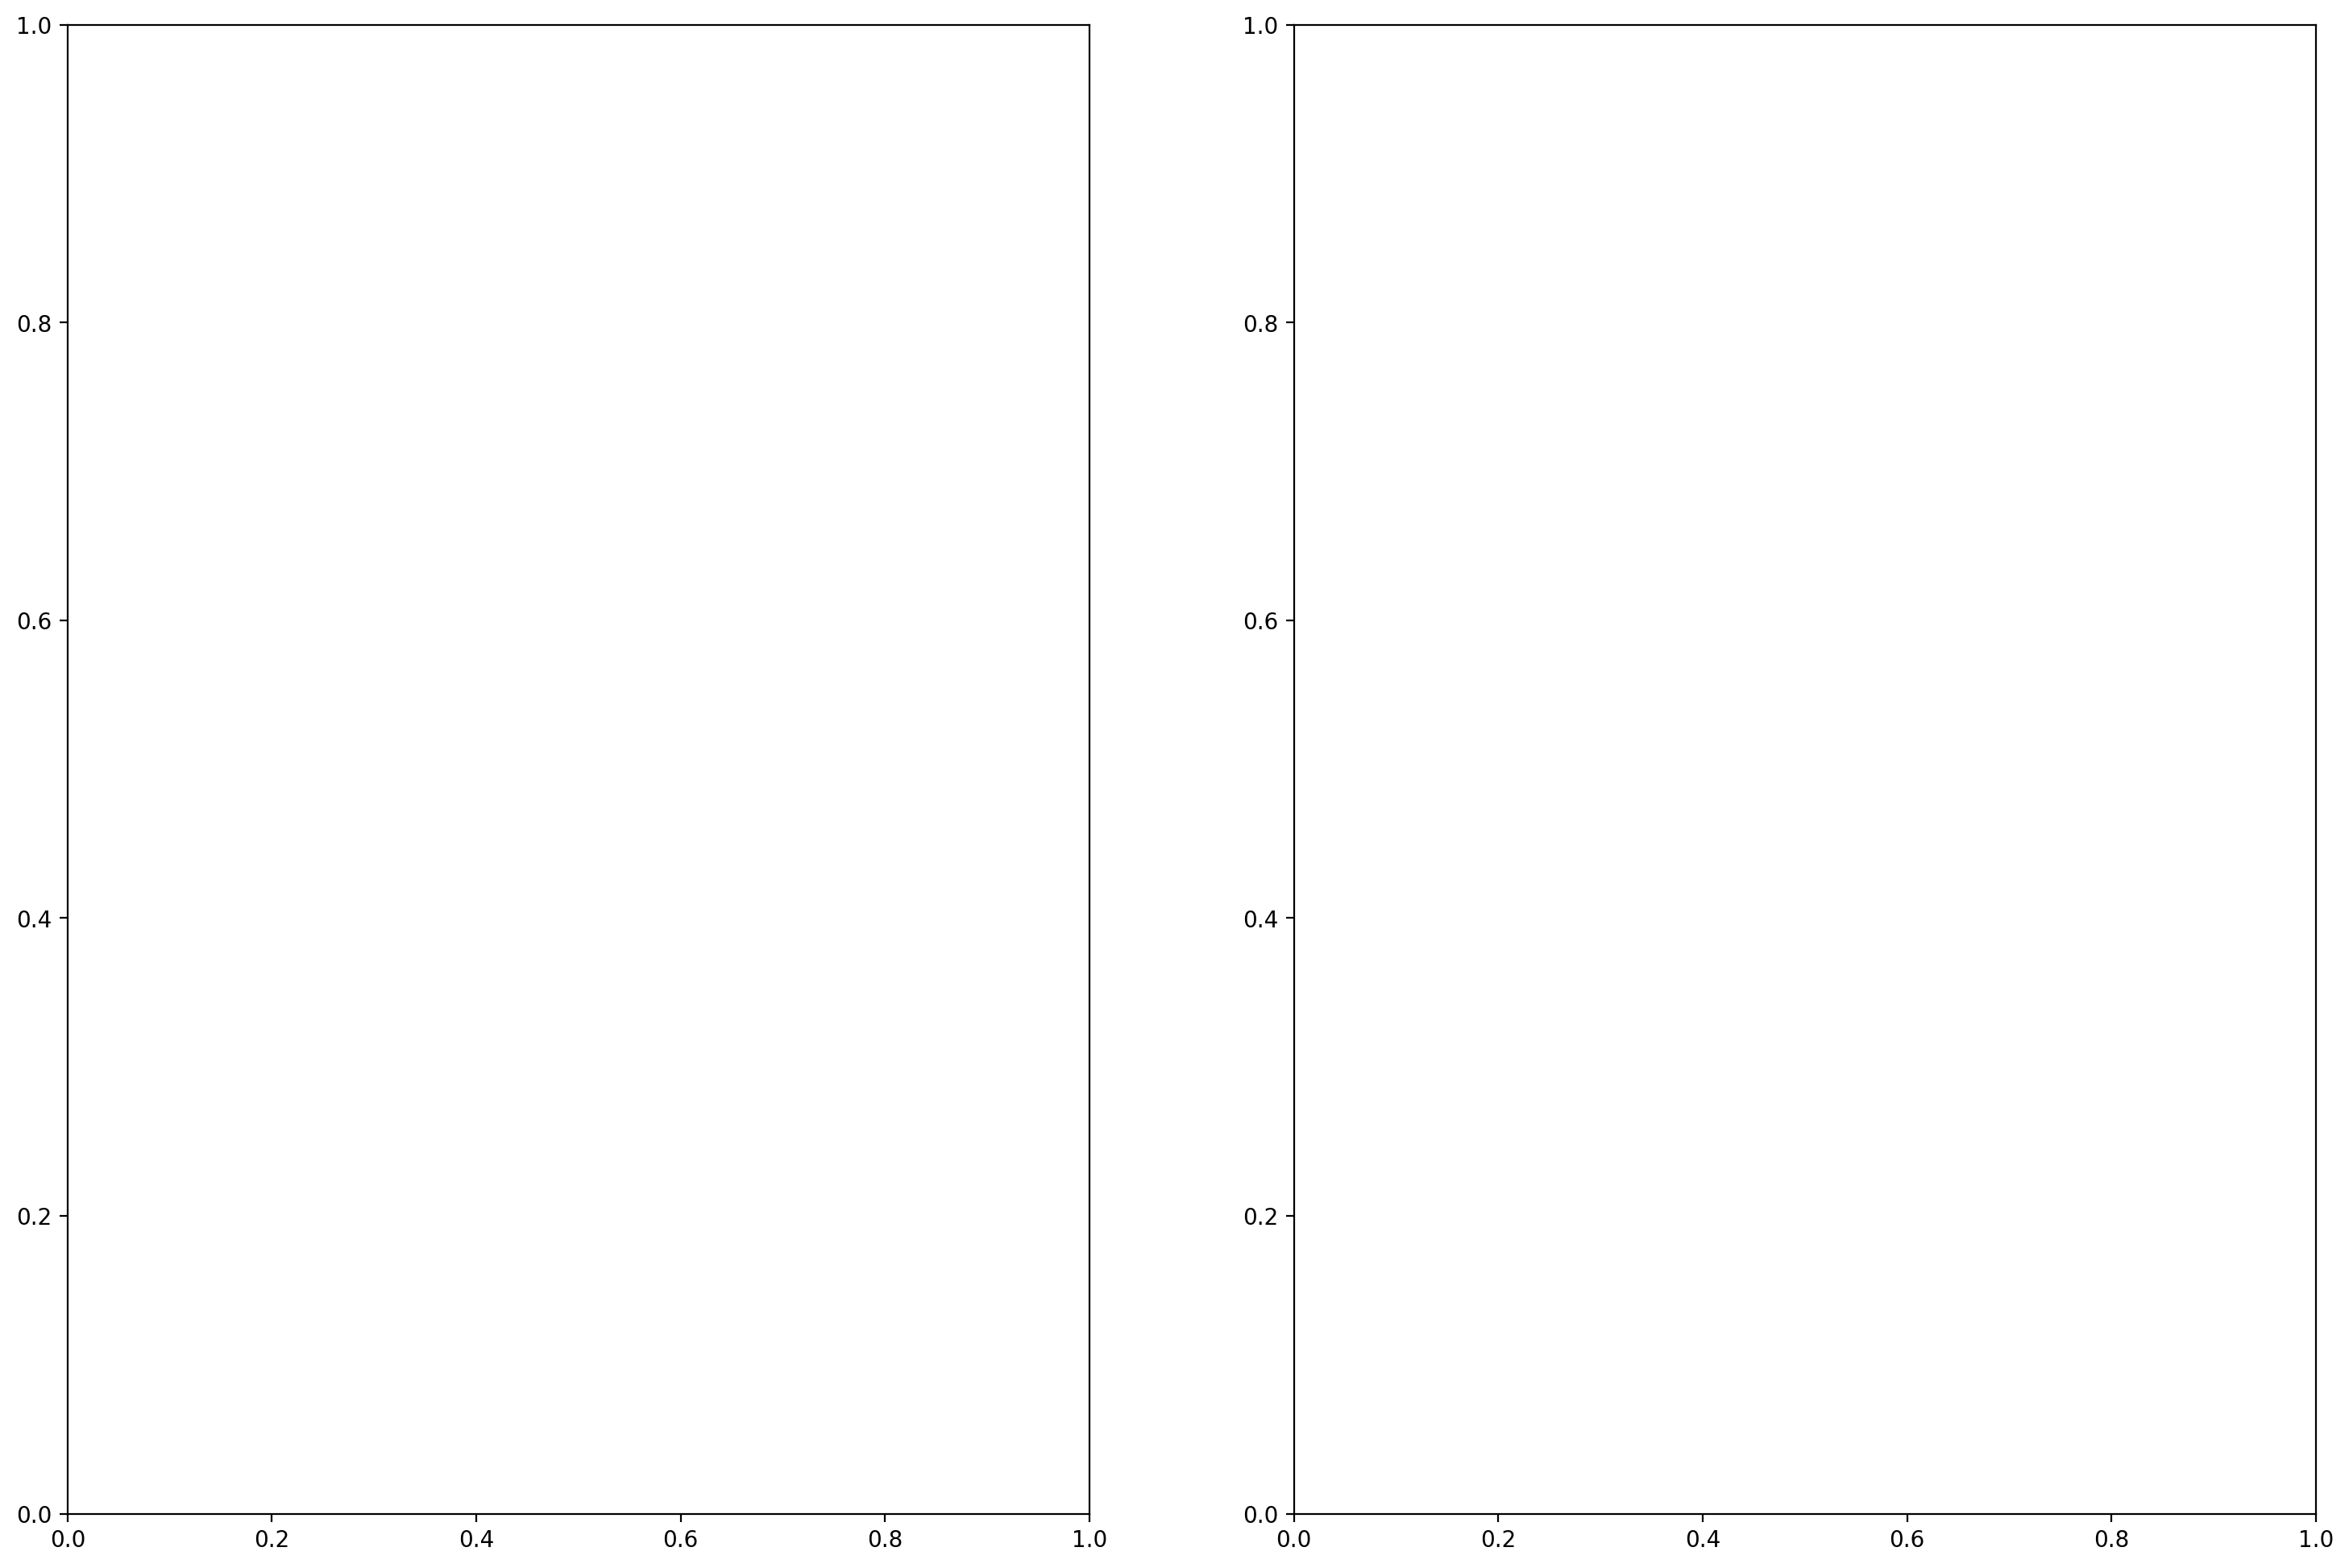

In [7]:
data_freemove = scores.query("data=='freemove' and nr_points==4").sort_values('fscore_user_mean', ascending=False)
data_geolife = scores.query("data=='geolife' and nr_points==4").sort_values('fscore_user_mean', ascending=False)

print("\nfreemove")
print('Median PRECISION of top 25% of users:', data_freemove[data_freemove.fscore_user_mean >= data_freemove.fscore_user_mean.quantile(0.75)].precision.median())
print('Median RECALL of top 25% of users:', data_freemove[data_freemove.fscore_user_mean >= data_freemove.fscore_user_mean.quantile(0.75)].recall.median())
print('Median N_trips of top 25% of users:', data_freemove[data_freemove.fscore_user_mean >= data_freemove.fscore_user_mean.quantile(0.75)].n_trips.median())

print("\nGeoLife")
print('Median PRECISION of top 25% of users:', data_geolife[data_geolife.fscore_user_mean >= data_geolife.fscore_user_mean.quantile(0.75)].precision.median())
print('Median RECALL of top 25% of users:', data_geolife[data_geolife.fscore_user_mean >= data_geolife.fscore_user_mean.quantile(0.75)].recall.median())
print('Median N_trips of top 25% of users:', data_geolife[data_geolife.fscore_user_mean >= data_geolife.fscore_user_mean.quantile(0.75)].n_trips.median())


data_geolife.fscore_user_mean.quantile(0.25)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,12), sharey=False, sharex=True)

ax = sns.pointplot(x="precision", y="user_id", data=data_freemove, s=100, color=sns.color_palette("colorblind").as_hex()[1], label="Precision", join=False, ax=ax1)
ax = sns.pointplot(x="recall", y="user_id", data=data_freemove, s=100, color=sns.color_palette("colorblind").as_hex()[2], label="Recall", join=False, ax=ax1)
plt.setp(ax1.collections, alpha=.15) #for the markers
plt.setp(ax1.lines, alpha=.15)
ax = sns.pointplot(x="f_score", y="user_id", data=data_freemove, s=100, join=False, ax=ax1)

ax = sns.pointplot(x="precision", y="user_id", color=sns.color_palette("colorblind").as_hex()[1], data=data_geolife, s=100, join=False, ax=ax2)
ax = sns.pointplot(x="recall", y="user_id", color=sns.color_palette("colorblind").as_hex()[2], data=data_geolife, s=100, join=False, ax=ax2)
plt.setp(ax2.collections, alpha=.15) #for the markers
plt.setp(ax2.lines, alpha=.15)
ax = sns.pointplot(x="f_score", y="user_id", data=data_geolife, s=100, join=False, ax=ax2)


fscore_q25_mean = data_freemove.fscore_user_mean.quantile(0.25)
fscore_q5_mean = data_freemove.fscore_user_mean.quantile(0.5)
fscore_q75_mean = data_freemove.fscore_user_mean.quantile(0.75)
ax1.axvline(fscore_q25_mean, color='k', ls='--', lw=2, alpha=0.4)
ax1.axvline(fscore_q5_mean, color='k', ls='--', lw=2, alpha=0.9)
ax1.axvline(fscore_q75_mean, color='k', ls='--', lw=2, alpha=0.4)
ax1.text(x=fscore_q25_mean, y=-1, s=np.round(fscore_q25_mean,2), fontsize=16, alpha=0.4)
ax1.text(x=fscore_q5_mean, y=-1, s=np.round(fscore_q5_mean,2), fontsize=16)
ax1.text(x=fscore_q75_mean, y=-1, s=np.round(fscore_q75_mean,2), fontsize=16, alpha=0.4)

fscore_q25_mean = data_geolife.fscore_user_mean.quantile(0.25)
fscore_q5_mean = data_geolife.fscore_user_mean.quantile(0.5)
fscore_q75_mean = data_geolife.fscore_user_mean.quantile(0.75)
ax2.axvline(fscore_q25_mean, color='k', ls='--', lw=2, alpha=0.4)
ax2.axvline(fscore_q5_mean, color='k', ls='--', lw=2, alpha=0.9)
ax2.axvline(fscore_q75_mean, color='k', ls='--', lw=2, alpha=0.4)
ax2.text(x=fscore_q25_mean, y=-1, s=np.round(fscore_q25_mean,2), fontsize=16, alpha=0.4)
ax2.text(x=fscore_q5_mean, y=-1, s=np.round(fscore_q5_mean,2), fontsize=16)
ax2.text(x=fscore_q75_mean, y=-1, s=np.round(fscore_q75_mean,2), fontsize=16, alpha=0.4)


fscore_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[0], label='F-Score')
prec_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[1], label='Precision')
recall_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[2], label='Recall')
ax1.legend(handles=[fscore_patch, prec_patch, recall_patch], fontsize=14)


fontsize = 16
ax1.set_xlabel('Value', fontsize=fontsize)
ax2.set_xlabel('Value', fontsize=fontsize)
ax1.set_ylabel('freemove Users', fontsize=fontsize)
ax2.set_ylabel('GeoLife Users', fontsize=fontsize)
ax1.set_yticklabels([])
ax2.set_yticklabels([])
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)


# Loop through each subplot and add labels
for i, ax in enumerate([ax1, ax2]):
    # Add the subplot label with bold font, aligned to the left, and only showing the letter
    ax.text(-0.1, 1.06, chr(65+i), transform=ax.transAxes, fontsize=26, fontweight='bold', ha='left', va='top')


In [5]:
print('Median PRECISION of top 25% of users:', data_geolife[data_geolife.fscore_user_mean >= data_geolife.fscore_user_mean.quantile(0.75)].precision.median())
print('Median RECALL of top 25% of users:', data_geolife[data_geolife.fscore_user_mean >= data_geolife.fscore_user_mean.quantile(0.75)].recall.median())


Median PRECISION of top 25% of users: 0.8157894736842105
Median RECALL of top 25% of users: 0.6271186440677966


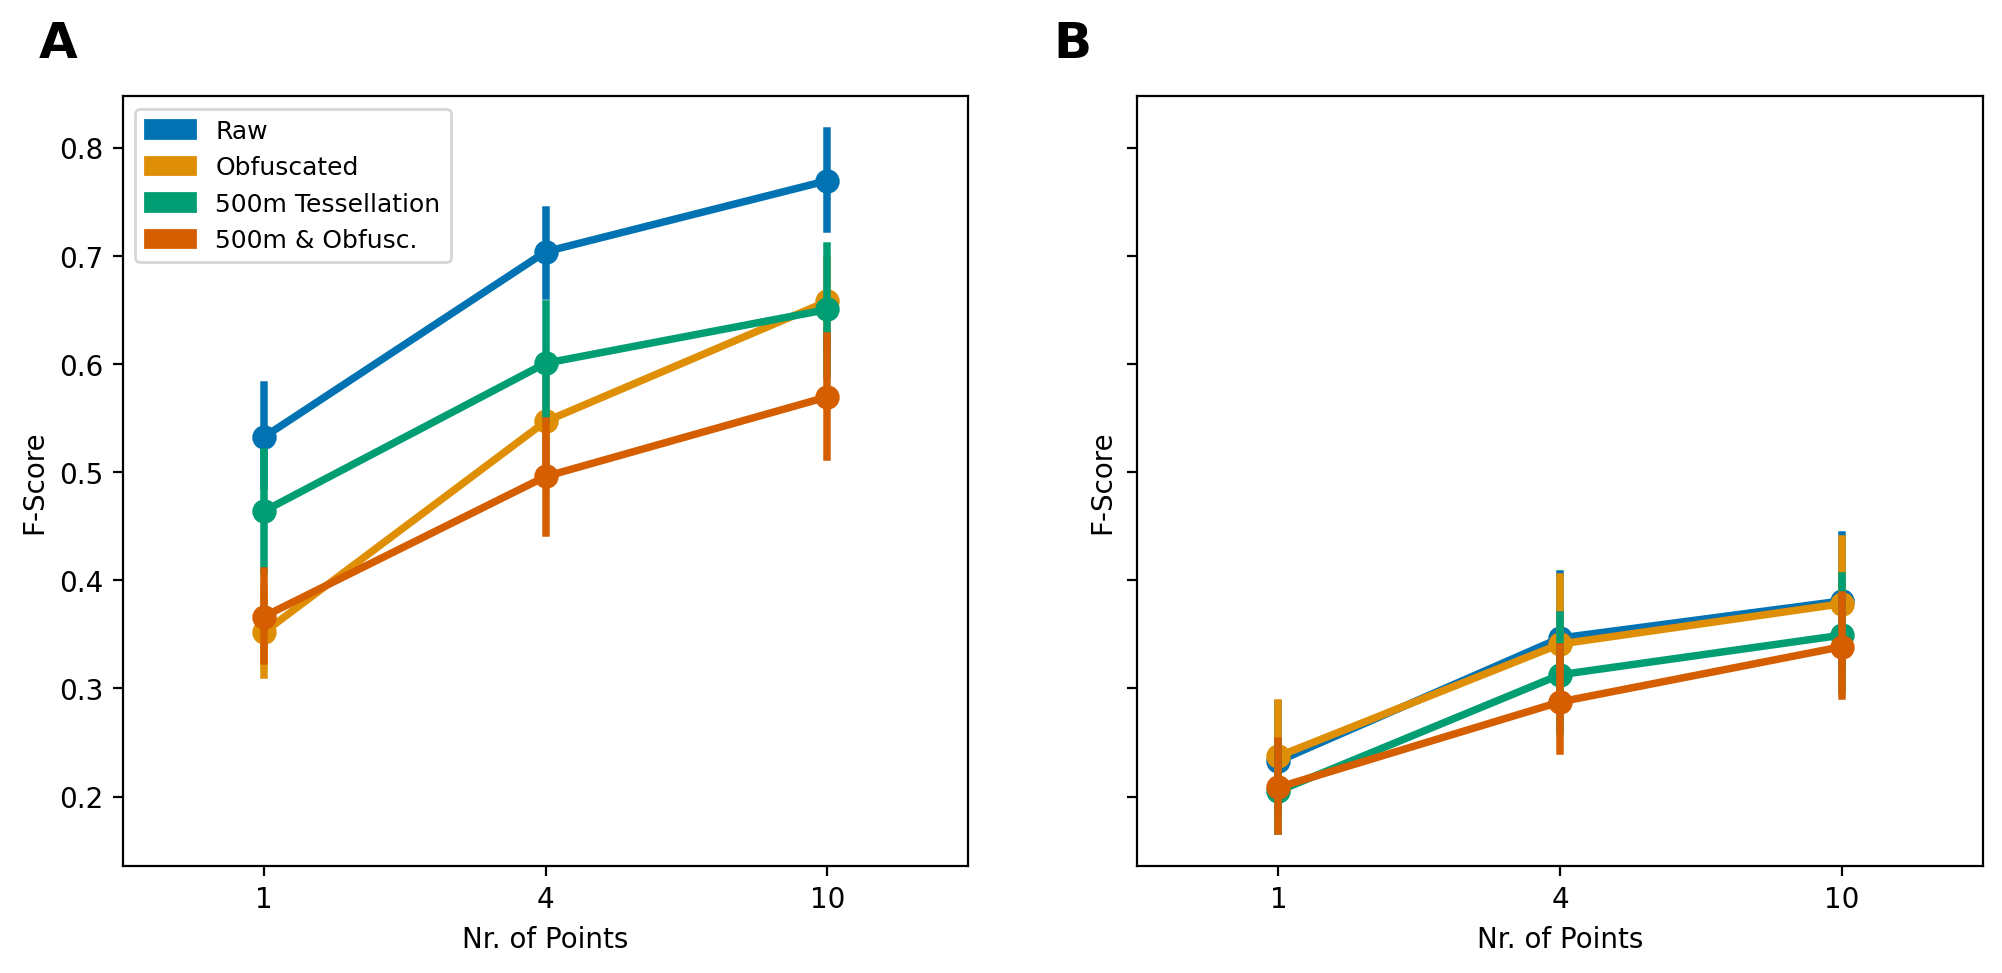

In [9]:
data_geolife = scores[['data', 'user_id', 'nr_points', 'fscore_user_mean']].drop_duplicates().query('data in ["geolife", "geolife_500tessellation", "geolife_private", "geolife_private_500tessellation"]')
data_freemove = scores[['data', 'user_id', 'nr_points', 'fscore_user_mean']].drop_duplicates().query('data in ["freemove", "freemove_private", "freemove_500tessellation", "freemove_private_500tessellation"]')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5), sharey=True, sharex=True)

ax1 = sns.pointplot(x="nr_points", y="fscore_user_mean", data=data_freemove, hue='data', ax=ax1)
ax2 = sns.pointplot(x="nr_points", y="fscore_user_mean", data=data_geolife, hue='data', ax=ax2)


ax2.set_xlabel("Nr. of Points")
ax1.set_xlabel("Nr. of Points")
ax2.set_ylabel("F-Score")
ax1.set_ylabel("F-Score")

ax2.legend([],[], frameon=False)

raw_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[0], label='Raw')
private_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[1], label='Obfuscated')
bigtes_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[2], label='500m Tessellation')
bigtes_private_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[3], label='500m & Obfusc.')
ax1.legend(handles=[raw_patch, private_patch, bigtes_patch, bigtes_private_patch], fontsize=9)

# Loop through each subplot and add labels
for i, ax in enumerate([ax1, ax2]):
    # Add the subplot label with bold font, aligned to the left, and only showing the letter
    ax.text(-0.1, 1.1, chr(65+i), transform=ax.transAxes, fontsize=18, fontweight='bold', ha='left', va='top')

In [14]:
scores[['data', 'user_id', 'nr_points', 'fscore_user_mean']].drop_duplicates().query('data in ["geolife", "geolife_500tessellation", "geolife_private", "geolife_private_500tessellation"]').groupby(['data', 'nr_points']).mean().reset_index()

C:\Users\Bened\AppData\Local\Temp\ipykernel_23096\473996200.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scores[['data', 'user_id', 'nr_points', 'fscore_user_mean']].drop_duplicates().query('data in ["geolife", "geolife_500tessellation", "geolife_private", "geolife_private_500tessellation"]').groupby(['data', 'nr_points']).mean().reset_index()


,data,nr_points,fscore_user_mean
0,geolife,1,0.232782
1,geolife,4,0.346644
2,geolife,10,0.380985
3,geolife_500tessellation,1,0.205103
4,geolife_500tessellation,4,0.312700
5,geolife_500tessellation,10,0.349334
6,geolife_private,1,0.237294
7,geolife_private,4,0.341097
8,geolife_private,10,0.378383
9,geolife_private_500tessellation,1,0.208512


In [39]:
data.query('data == "geolife"').fscore_user_mean.min()

0.3410974206637881

In [40]:
data

,data,nr_points,fscore_user_mean,type
1,freemove,4,0.703971,raw
4,freemove_500tessellation,4,0.600878,raw
7,freemove,4,0.547015,private
10,geolife_500tessellation,4,0.496057,private
13,geolife,4,0.346644,raw
16,geolife_500tessellation,4,0.312700,raw
19,geolife,4,0.341097,private
22,freemove_500tessellation,4,0.287581,private


                                data  nr_points  fscore_user_mean     type
1                           freemove          4          0.719243      raw
4           freemove_500tessellation          4          0.578015      raw
7                   freemove_private          4          0.566568  private
10  freemove_private_500tessellation          4          0.526790  private
13                           geolife          4          0.278027      raw
16           geolife_500tessellation          4          0.234810      raw
19                   geolife_private          4          0.323526  private
22   geolife_private_500tessellation          4          0.236118  private


C:\Users\Bened\AppData\Local\Temp\ipykernel_23096\3936692058.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = scores[['data', 'user_id', 'nr_points', 'fscore_user_mean']].drop_duplicates().groupby(['data', 'nr_points']).median().reset_index().query('nr_points == 4')
C:\Users\Bened\AppData\Local\Temp\ipykernel_23096\3936692058.py:21: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.scatterplot(x="fscore_user_mean", y="data", data=data, hue='type', zorder=10, s=100, palette=sns.color_palette("colorblind")[2:])


Text(0.21146387814844578, 2.9, '∆ 0.001')

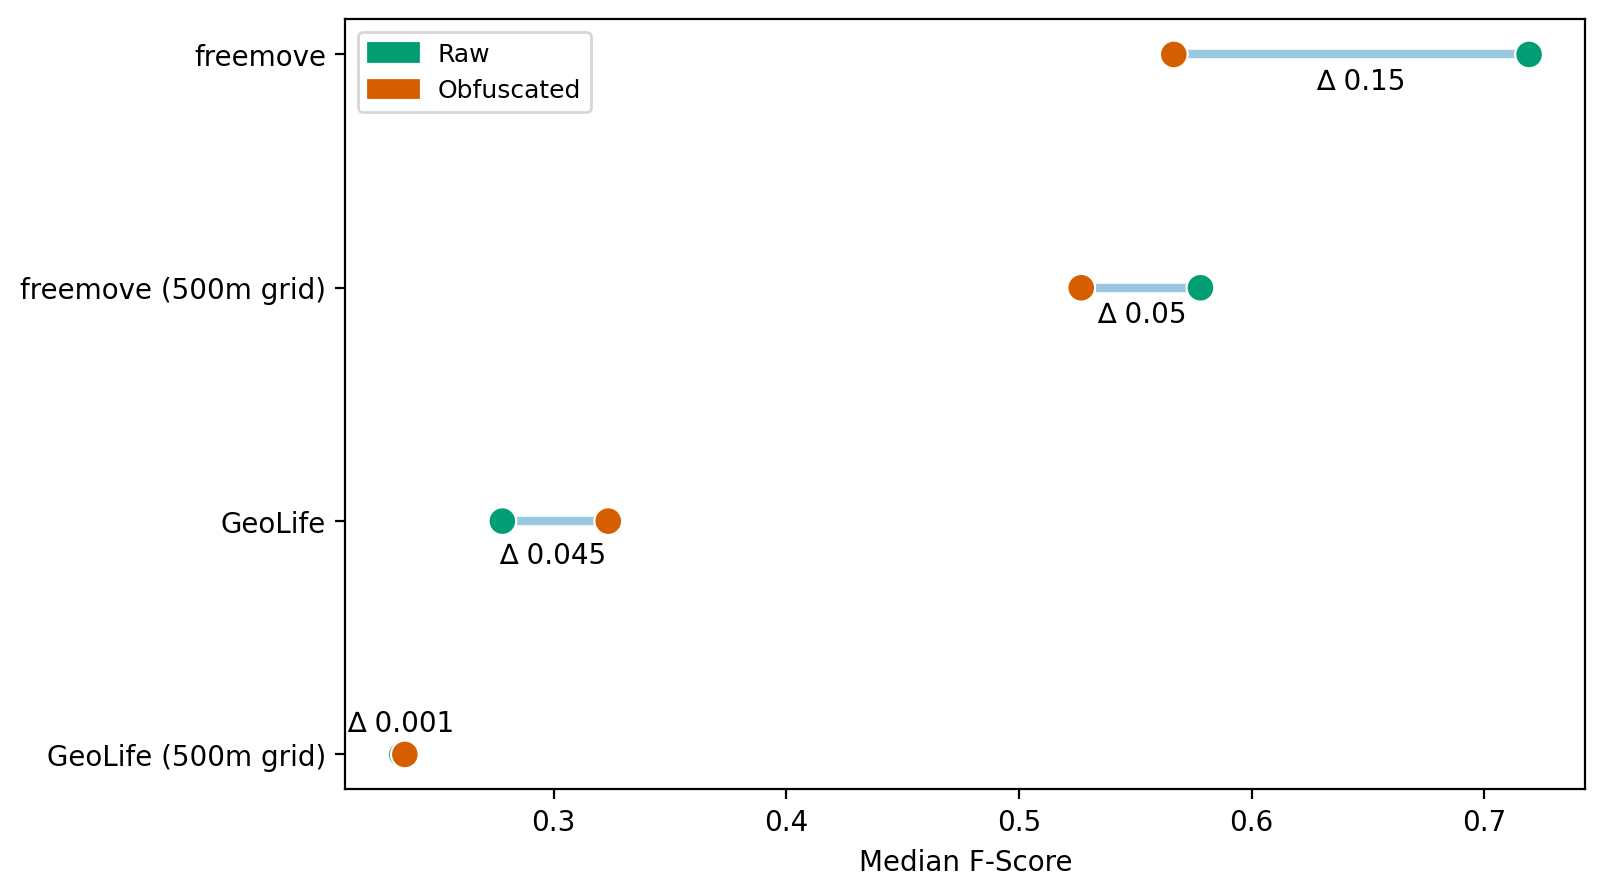

In [127]:
data = scores[['data', 'user_id', 'nr_points', 'fscore_user_mean']].drop_duplicates().groupby(['data', 'nr_points']).median().reset_index().query('nr_points == 4')


data['type'] = ['raw', 'raw', 'private', 'private', 'raw', 'raw', 'private', 'private']


print(data)

data.loc[data.data == 'freemove_private', 'data'] = 'freemove'
data.loc[data.data == 'geolife_private', 'data'] = 'GeoLife'
data.loc[data.data == 'geolife', 'data'] = 'GeoLife'
data.loc[data.data == 'geolife_500tessellation', 'data'] = 'GeoLife (500m grid)'
data.loc[data.data == 'freemove_500tessellation', 'data'] = 'freemove (500m grid)'
data.loc[data.data == 'geolife_private_500tessellation', 'data'] = 'GeoLife (500m grid)'
data.loc[data.data == 'freemove_private_500tessellation', 'data'] = 'freemove (500m grid)'


fig, ax = plt.subplots(figsize=(8,5))


ax = sns.scatterplot(x="fscore_user_mean", y="data", data=data, hue='type', zorder=10, s=100, palette=sns.color_palette("colorblind")[2:])

ax.hlines(y='freemove', xmin=data.query('data == "freemove"').fscore_user_mean.min(), xmax=data.query('data == "freemove"').fscore_user_mean.max(), alpha=0.4, linewidth=3)
ax.hlines(y='GeoLife', xmin=data.query('data == "GeoLife"').fscore_user_mean.min(), xmax=data.query('data == "GeoLife"').fscore_user_mean.max(), alpha=0.4, linewidth=3)
ax.hlines(y='freemove (500m grid)', xmin=data.query('data == "freemove (500m grid)"').fscore_user_mean.min(), xmax=data.query('data == "freemove (500m grid)"').fscore_user_mean.max(), alpha=0.4, linewidth=3)
ax.hlines(y='GeoLife (500m grid)', xmin=data.query('data == "GeoLife (500m grid)"').fscore_user_mean.min(), xmax=data.query('data == "GeoLife (500m grid)"').fscore_user_mean.max(), alpha=0.4, linewidth=3)

ax.set_xlabel("Median F-Score")
ax.set_ylabel("")


raw_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[2], label='Raw')
private_patch = mpatches.Patch(color=sns.color_palette("colorblind").as_hex()[3], label='Obfuscated')
ax.legend(handles=[raw_patch, private_patch], fontsize=9)


diff = data.query('data == "freemove"').fscore_user_mean.max() - data.query('data == "freemove"').fscore_user_mean.min()
ax.text(x=data.query('data == "freemove"').fscore_user_mean.mean() - 0.015, y=0.15, s=f"∆ {np.round(diff, 2)}", fontsize=10)

diff = data.query('data == "freemove (500m grid)"').fscore_user_mean.max() - data.query('data == "freemove (500m grid)"').fscore_user_mean.min()
ax.text(x=data.query('data == "freemove (500m grid)"').fscore_user_mean.mean() - 0.019, y=1.15, s=f"∆ {np.round(diff, 2)}", fontsize=10)

diff = data.query('data == "GeoLife"').fscore_user_mean.max() - data.query('data == "GeoLife"').fscore_user_mean.min()
ax.text(x=data.query('data == "GeoLife"').fscore_user_mean.mean() - 0.024, y=2.18, s=f"∆ {np.round(diff, 3)}", fontsize=10)

diff = data.query('data == "GeoLife (500m grid)"').fscore_user_mean.max() - data.query('data == "GeoLife (500m grid)"').fscore_user_mean.min()
ax.text(x=data.query('data == "GeoLife (500m grid)"').fscore_user_mean.mean() - 0.024, y=2.9, s=f"∆ {np.round(diff, 3)}", fontsize=10)


In [65]:
data

,data,nr_points,fscore_user_mean,type
1,freemove,4,0.703971,raw
4,freemove_500tessellation,4,0.600878,raw
7,freemove,4,0.547015,private
10,freemove (500m grid),4,0.496057,private
13,geolife,4,0.346644,raw
16,geolife_500tessellation,4,0.312700,raw
19,GeoLife,4,0.341097,private
22,GeoLife (500m grid),4,0.287581,private


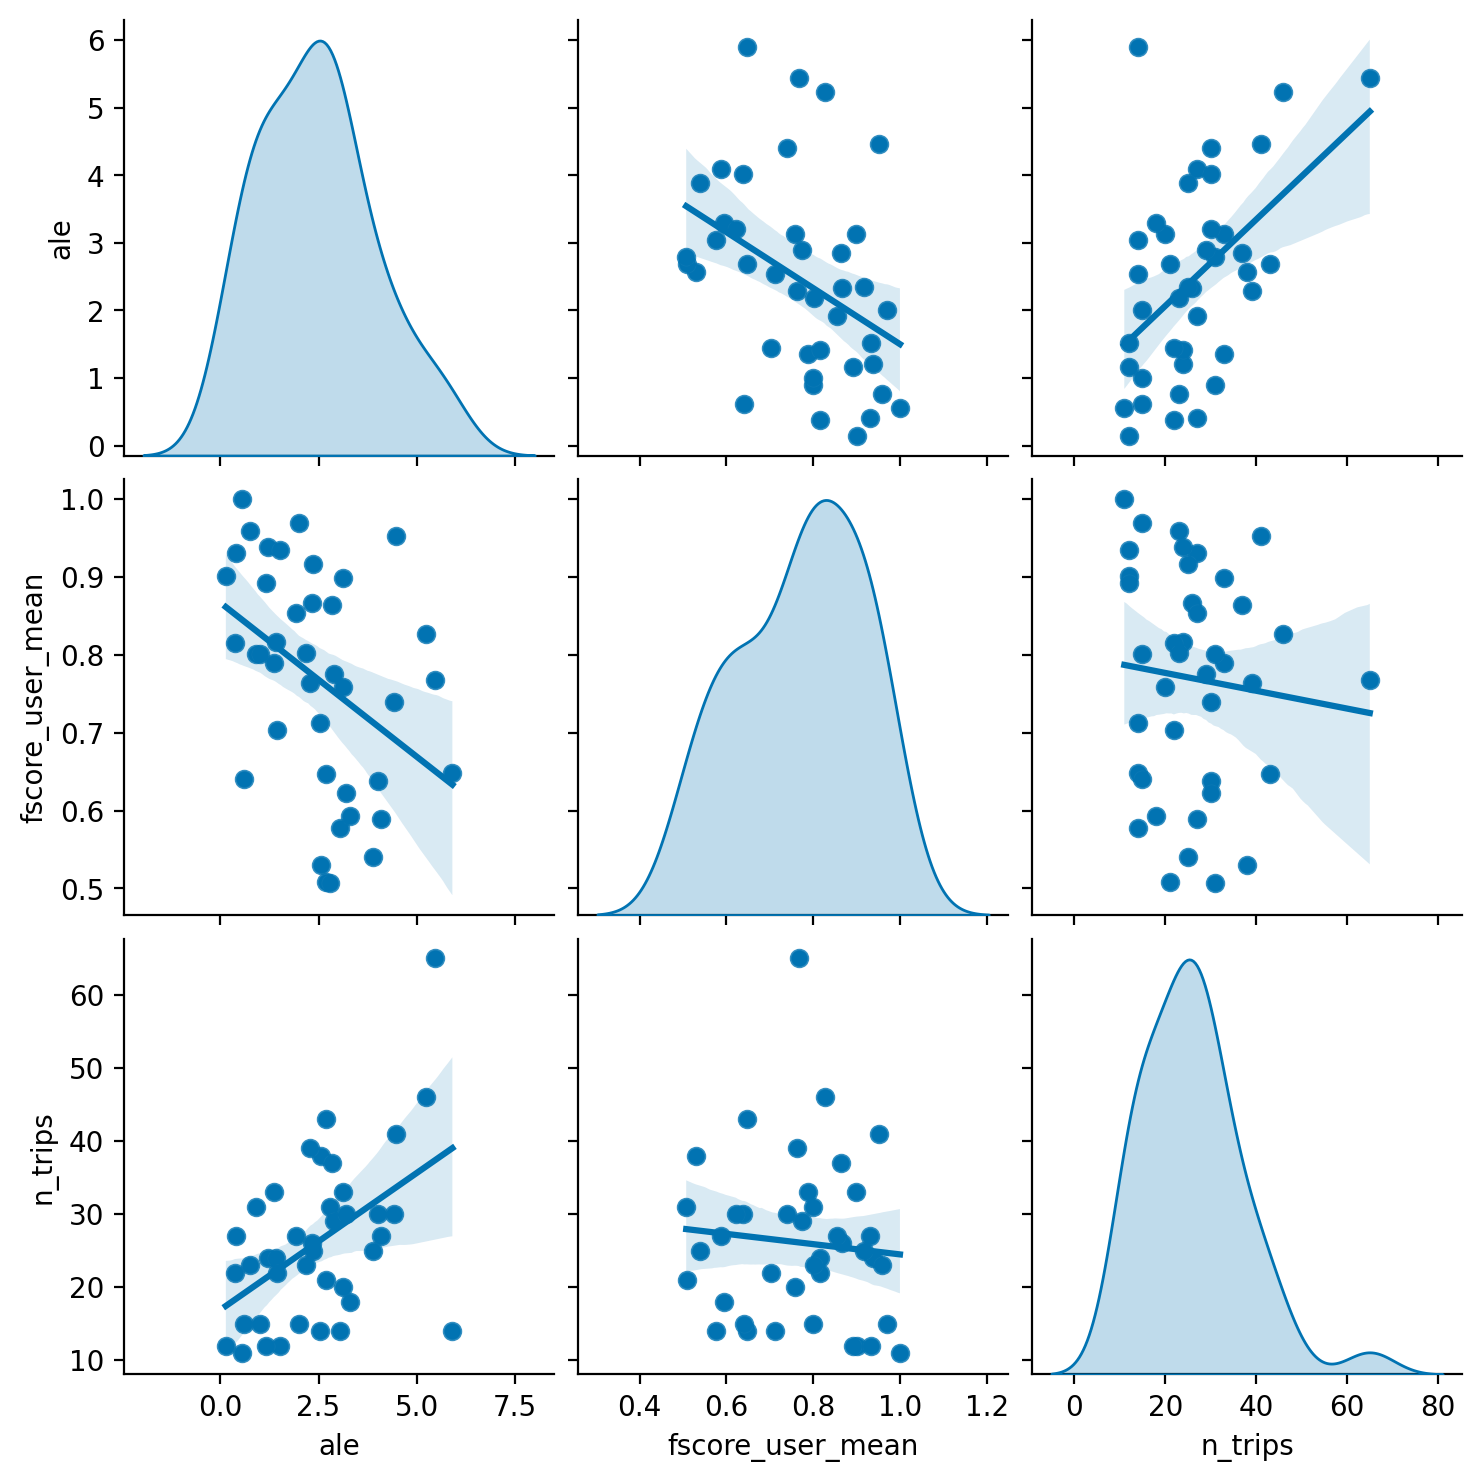

In [407]:
data_pairplot = scores.groupby(['data', 'nr_points', 'user_id']).mean().reset_index().query('nr_points == 10 and (data == "freemove")')
g = sns.pairplot(data_pairplot[['ale', 'fscore_user_mean', 'n_trips']], diag_kind="kde")
g.map_offdiag(sns.regplot)

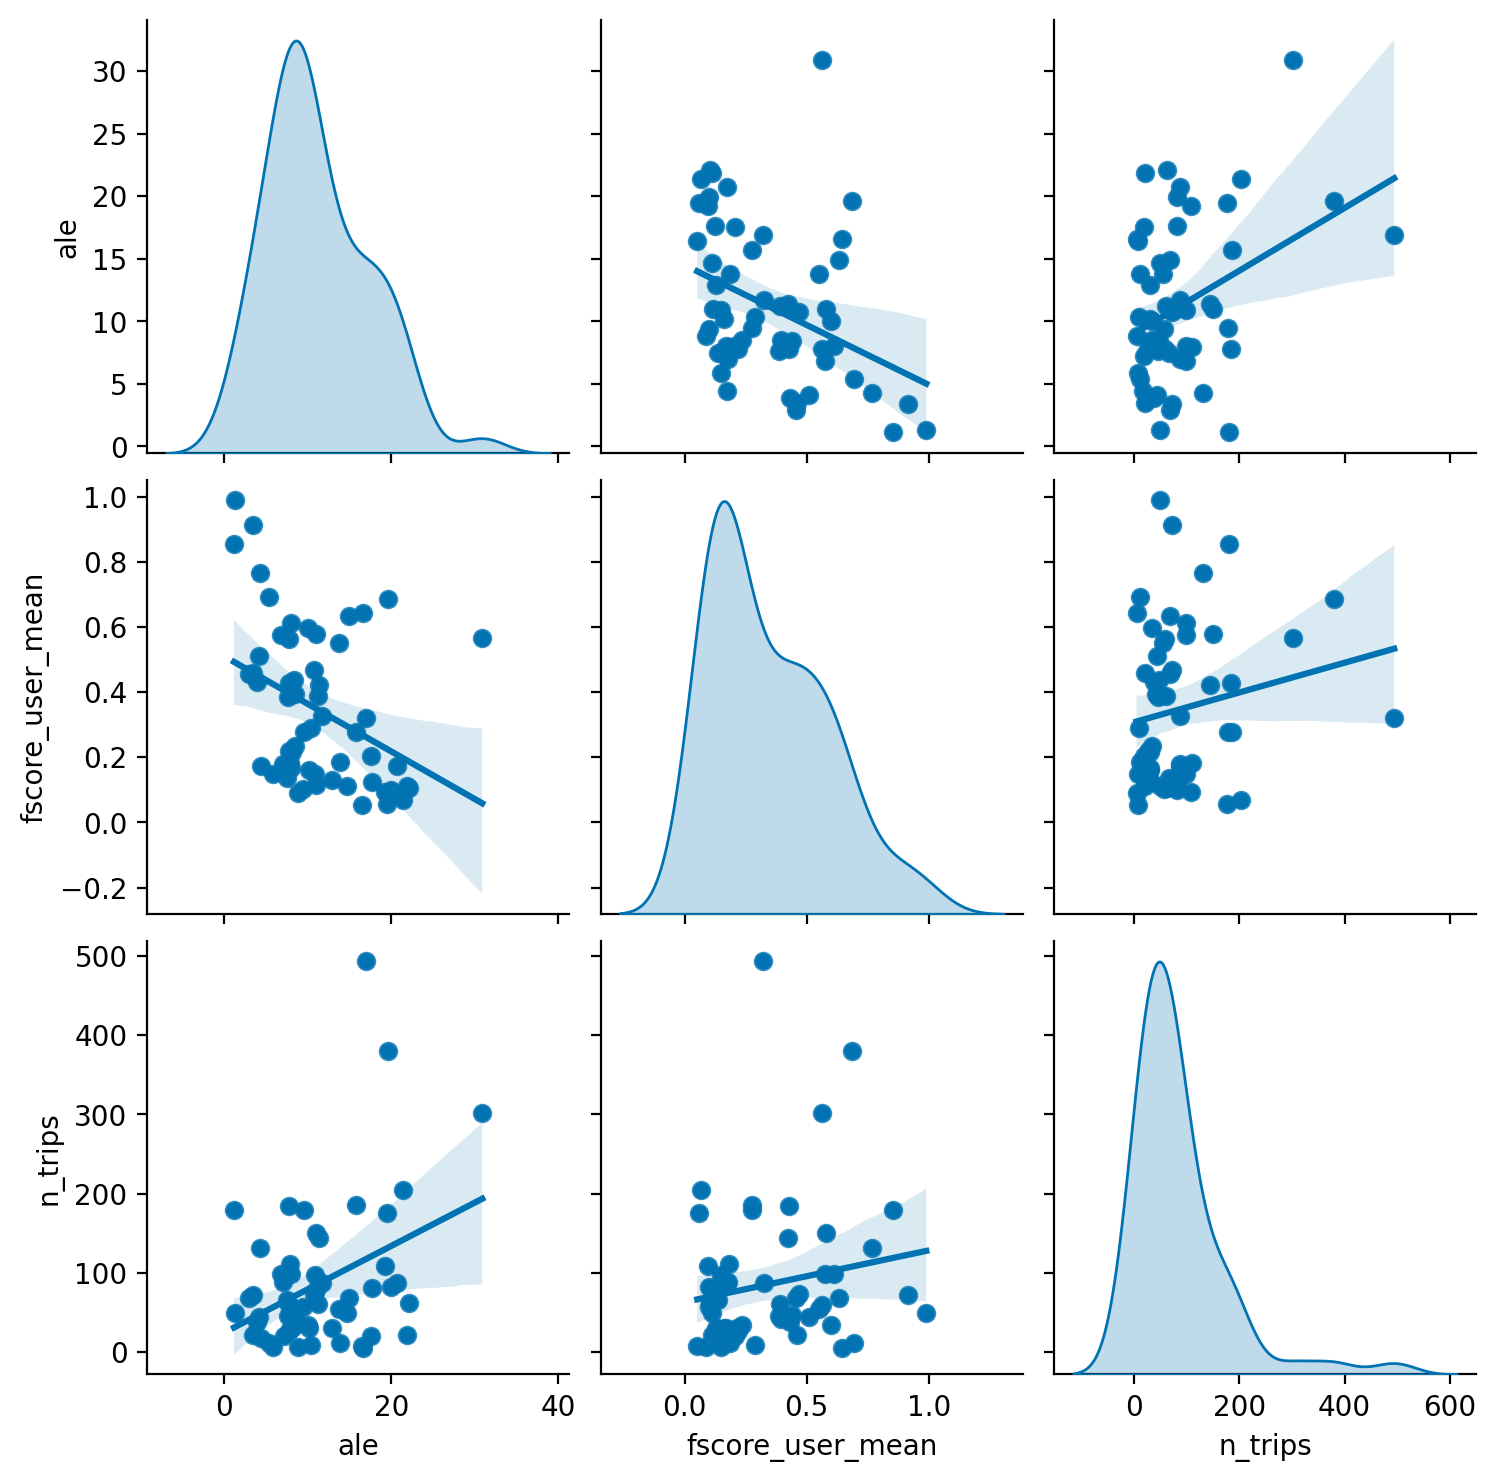

In [408]:
data_pairplot = scores.groupby(['data', 'nr_points', 'user_id']).mean().reset_index().query('nr_points == 4 and (data == "geolife")')
g = sns.pairplot(data_pairplot[['ale', 'fscore_user_mean', 'n_trips']], diag_kind="kde")
g.map_offdiag(sns.regplot)

Text(-0.16, 1.17, 'B')

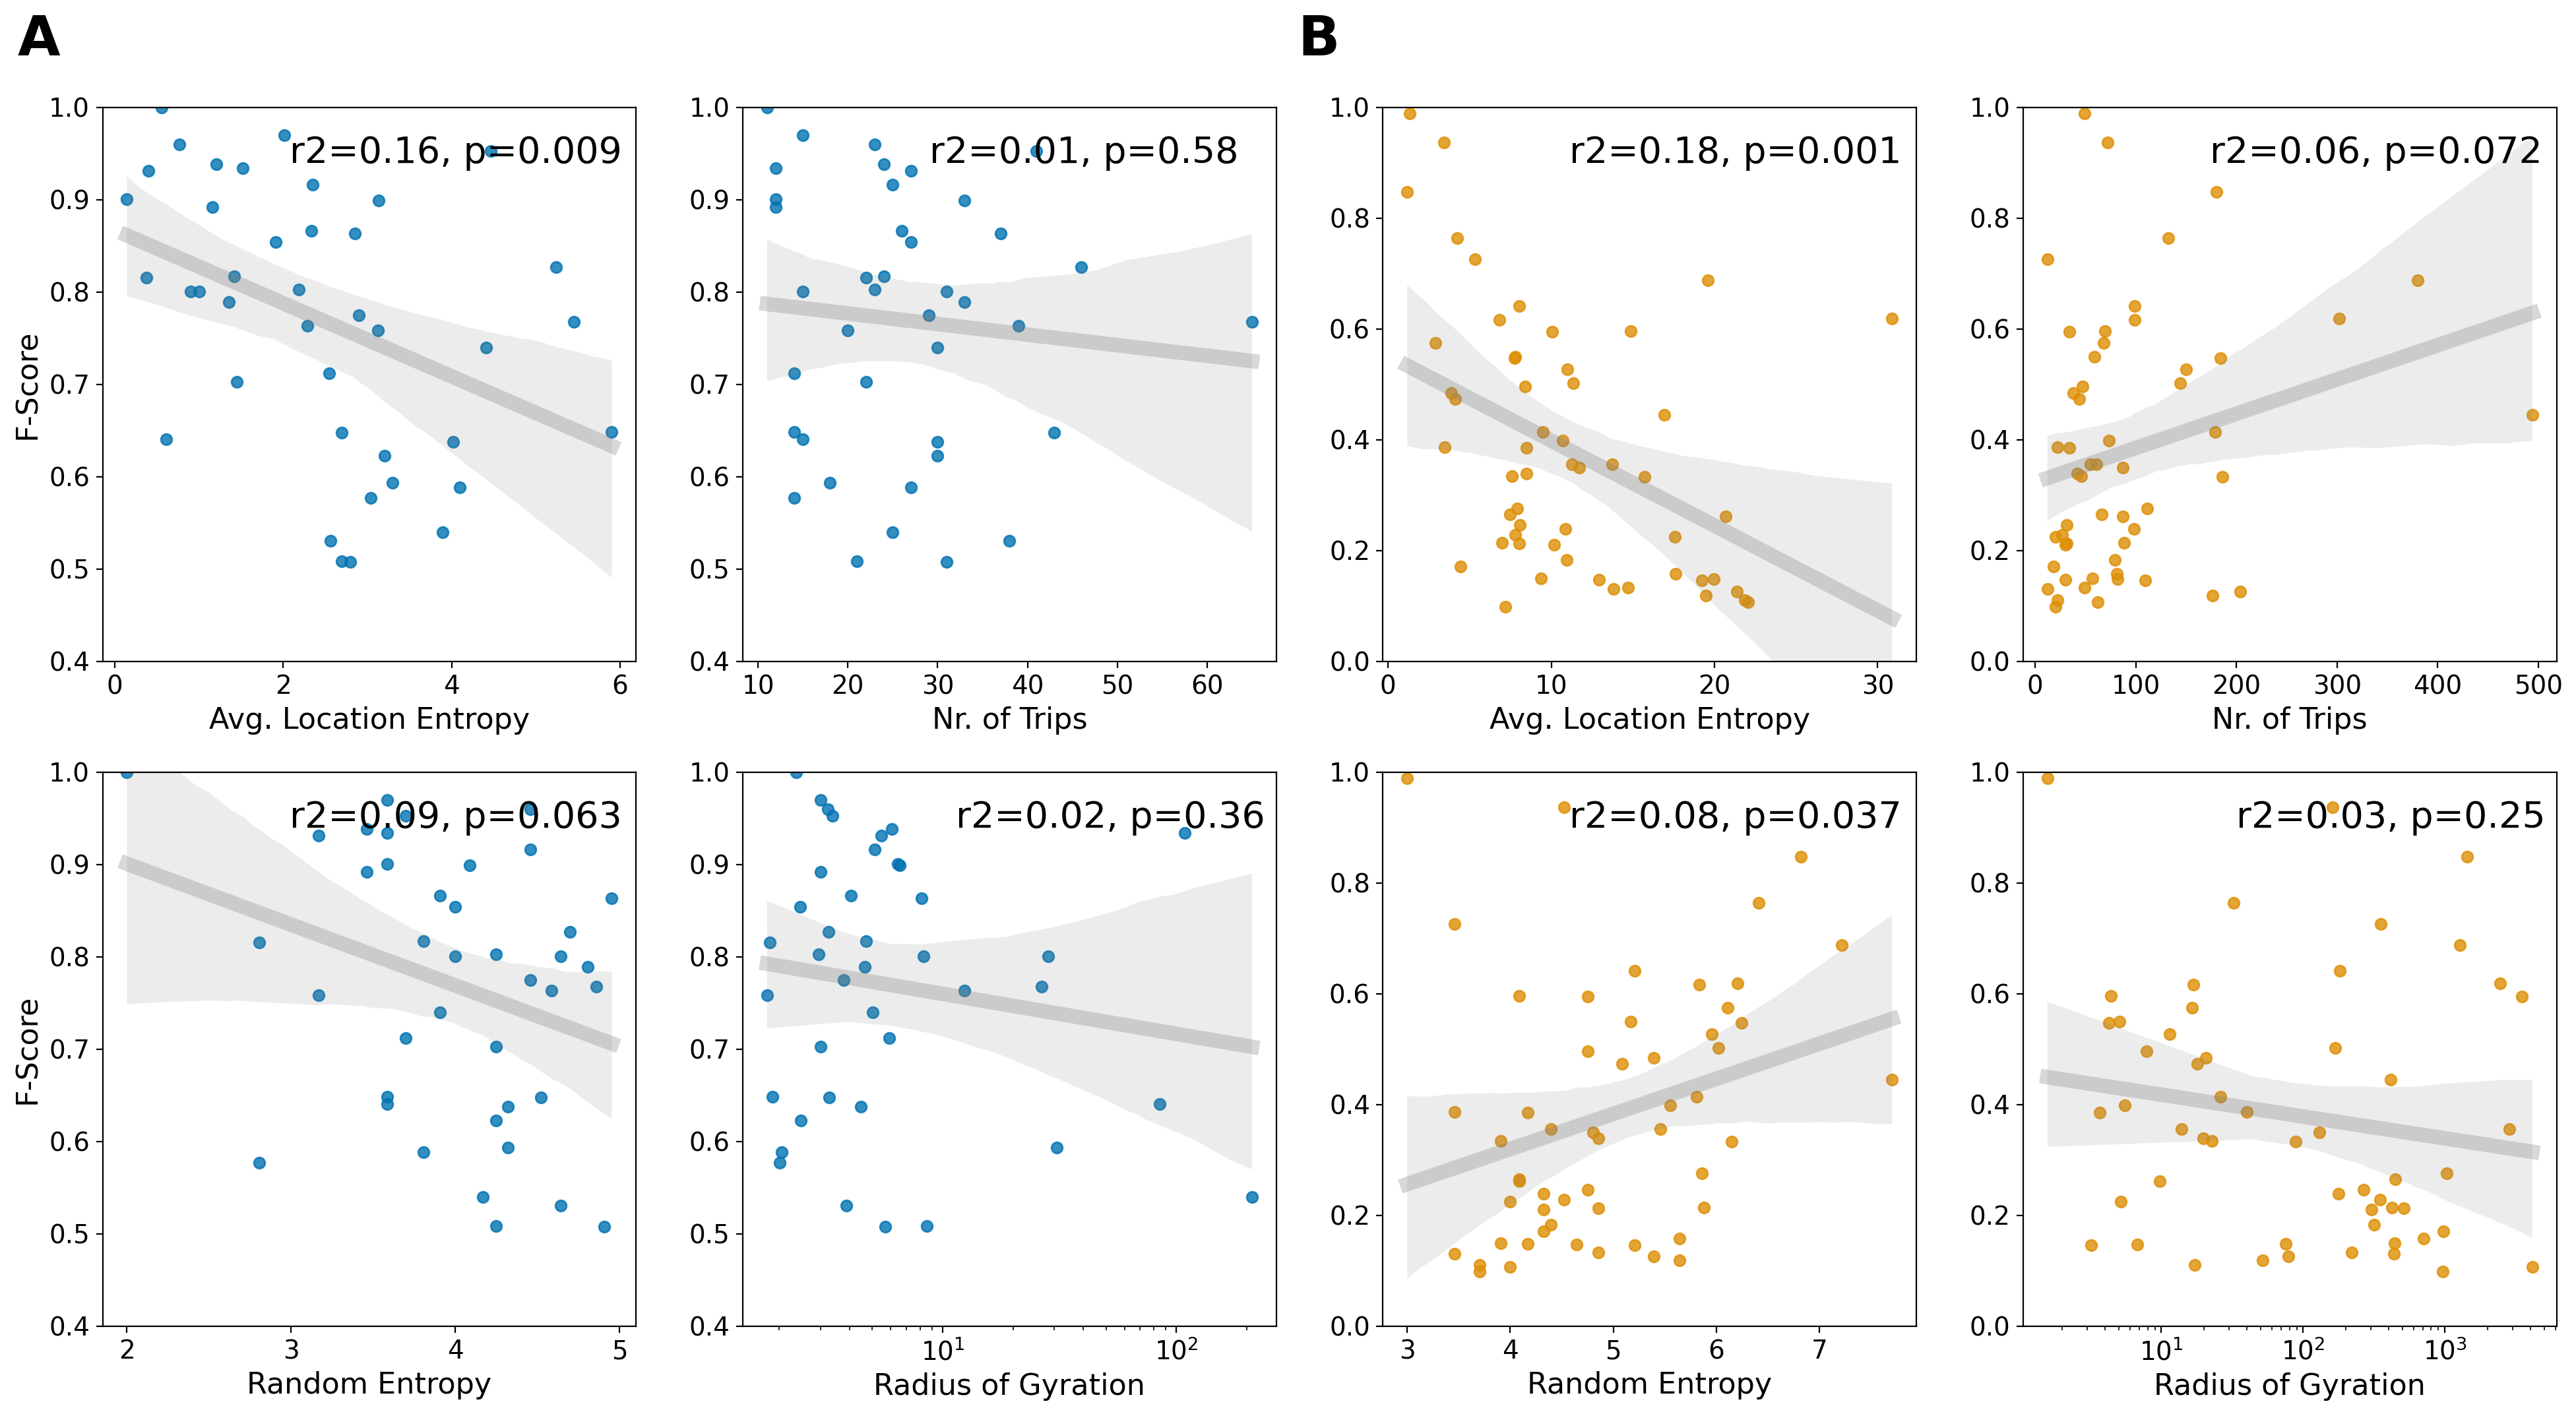

In [477]:
data_pairplot_geolife = scores.groupby(['data', 'nr_points', 'user_id']).mean().reset_index().query('nr_points == 10 and (data == "geolife")')
data_pairplot_freemove = scores.groupby(['data', 'nr_points', 'user_id']).mean().reset_index().query('nr_points == 10 and (data == "freemove")')


f, (ax_1, ax_2) = plt.subplots(nrows=2, ncols=4, sharey=False, sharex=False, figsize=(24,12))

import scipy
import numpy as np

def annotate(ax, data, x, y):
    slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(x=data[x], y=data[y])
    ax.text(.35, .9, f'r2={rvalue ** 2:.2f}, p={np.round(pvalue,3):.2g}', transform=ax.transAxes, fontsize=20)

ax = sns.regplot(
            x='ale', 
            y='fscore_user_mean',
            data=data_pairplot_freemove,
            line_kws={'linewidth':8, 'alpha':.3, 'color':'grey'},
            ax=ax_1[0])
annotate(ax_1[0], data_pairplot_freemove, x='ale', y='fscore_user_mean')

ax = sns.regplot(
            x='n_trips', 
            y='fscore_user_mean',
            data=data_pairplot_freemove,
            line_kws={'linewidth':8, 'alpha':.3, 'color':'grey'},
            ax=ax_1[1])
annotate(ax_1[1], data_pairplot_freemove, x='n_trips', y='fscore_user_mean')

ax = sns.regplot(
            x='rand_entropy', 
            y='fscore_user_mean',
            data=data_pairplot_freemove,
            line_kws={'linewidth':8, 'alpha':.3, 'color':'grey'},
            ax=ax_2[0])
annotate(ax_2[0], data_pairplot_freemove, x='rand_entropy', y='fscore_user_mean')

#Slope is the change in Y when the log(X) changes by 1.0 (so X changes by a factor of 10)
ax = sns.regplot(
            x='radius_of_gyration', 
            y='fscore_user_mean',
            data=data_pairplot_freemove,
            ax=ax_2[1],
            line_kws={'linewidth':8, 'alpha':.3, 'color':'grey'},
            logx=True)

slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(x=np.log(data_pairplot_freemove['radius_of_gyration']), y=data_pairplot_freemove['fscore_user_mean'])
ax_2[1].text(.4, .9, f'r2={rvalue ** 2:.2f}, p={pvalue:.2g}', transform=ax.transAxes, fontsize=20)
ax_2[1].set(xscale="log")




ax = sns.regplot(
            x='ale', 
            y='fscore_user_mean',
            data=data_pairplot_geolife,
            color='#de8f05',
            line_kws={'linewidth':8, 'alpha':.3, 'color':'grey'},
            ax=ax_1[2])
annotate(ax_1[2], data_pairplot_geolife, x='ale', y='fscore_user_mean')

ax = sns.regplot(
            x='n_trips', 
            y='fscore_user_mean',
            data=data_pairplot_geolife,
            color='#de8f05',
            line_kws={'linewidth':8, 'alpha':.3, 'color':'grey'},
            ax=ax_1[3])
annotate(ax_1[3], data_pairplot_geolife, x='n_trips', y='fscore_user_mean')

ax = sns.regplot(
            x='rand_entropy', 
            y='fscore_user_mean',
            data=data_pairplot_geolife,
            color='#de8f05',
            line_kws={'linewidth':8, 'alpha':.3, 'color':'grey'},
            ax=ax_2[2])
annotate(ax_2[2], data_pairplot_geolife, x='rand_entropy', y='fscore_user_mean')

#Slope is the change in Y when the log(X) changes by 1.0 (so X changes by a factor of 10)
ax = sns.regplot(
            x='radius_of_gyration', 
            y='fscore_user_mean',
            data=data_pairplot_geolife,
            ax=ax_2[3],
            logx=True,
            color='#de8f05',
            line_kws={'linewidth':8, 'alpha':.3, 'color':'grey'})

slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(x=np.log(data_pairplot_geolife['radius_of_gyration']), y=data_pairplot_geolife['fscore_user_mean'])
ax_2[3].text(.4, .9, f'r2={rvalue ** 2:.2f}, p={pvalue:.2g}', transform=ax.transAxes, fontsize=20)
ax_2[3].set(xscale="log")

fontsize = 16
ax_1[0].set_xlabel('Avg. Location Entropy', fontsize=fontsize)
ax_1[1].set_xlabel('Nr. of Trips', fontsize=fontsize)
ax_1[2].set_xlabel('Avg. Location Entropy', fontsize=fontsize)
ax_1[3].set_xlabel('Nr. of Trips', fontsize=fontsize)

ax_2[0].set_xlabel('Random Entropy', fontsize=fontsize)
ax_2[1].set_xlabel('Radius of Gyration', fontsize=fontsize)
ax_2[2].set_xlabel('Random Entropy', fontsize=fontsize)
ax_2[3].set_xlabel('Radius of Gyration', fontsize=fontsize)

ax_1[0].set_ylabel('F-Score', fontsize=fontsize)
ax_1[1].set_ylabel('', fontsize=fontsize)
ax_1[2].set_ylabel('', fontsize=fontsize)
ax_1[3].set_ylabel('', fontsize=fontsize)
ax_2[0].set_ylabel('F-Score', fontsize=fontsize)
ax_2[1].set_ylabel('', fontsize=fontsize)
ax_2[2].set_ylabel('', fontsize=fontsize)
ax_2[3].set_ylabel('', fontsize=fontsize)



ax1.set_ylabel('freemove Users', fontsize=fontsize)
ax2.set_ylabel('GeoLife Users', fontsize=fontsize)
ax1.set_yticklabels([])
ax2.set_yticklabels([])
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

ax_1[0].set_ylim(0.4,1)
ax_1[1].set_ylim(0.4,1)
ax_2[0].set_ylim(0.4,1)
ax_2[1].set_ylim(0.4,1)

ax_1[2].set_ylim(0,1)
ax_1[3].set_ylim(0,1)
ax_2[2].set_ylim(0,1)
ax_2[3].set_ylim(0,1)

labelsize=14
ax_1[0].tick_params(labelsize=labelsize)
ax_1[1].tick_params(labelsize=labelsize)
ax_1[2].tick_params(labelsize=labelsize)
ax_1[3].tick_params(labelsize=labelsize)
ax_2[0].tick_params(labelsize=labelsize)
ax_2[1].tick_params(labelsize=labelsize)
ax_2[2].tick_params(labelsize=labelsize)
ax_2[3].tick_params(labelsize=labelsize)


ax_1[0].text(-0.16, 1.17, chr(65), transform=ax_1[0].transAxes, fontsize=30, fontweight='bold', ha='left', va='top')
ax_1[2].text(-0.16, 1.17, chr(65+1), transform=ax_1[2].transAxes, fontsize=30, fontweight='bold', ha='left', va='top')


In [363]:
data_hour_of_day

,data,user_id,precision,recall,pr_mean,f_score,nr_points,rand_entropy,ale,n_trips,hour_of_day,uid,radius_of_gyration,fscore_user_mean
495800,freemove,16348,1.0,0.692308,0.846154,0.818182,4,3.906891,2.334572,26.0,13.807692,16348.0,4.043032,0.830248
495801,freemove,16348,1.0,0.692308,0.846154,0.818182,4,3.906891,2.334572,26.0,13.807692,16349.0,3.867014,0.830248
495802,freemove,16348,1.0,0.692308,0.846154,0.818182,4,3.906891,2.334572,26.0,13.807692,16353.0,2.449512,0.830248
495803,freemove,16348,1.0,0.692308,0.846154,0.818182,4,3.906891,2.334572,26.0,13.807692,16354.0,1.871242,0.830248
495804,freemove,16348,1.0,0.692308,0.846154,0.818182,4,3.906891,2.334572,26.0,13.807692,16356.0,5.025835,0.830248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895395,freemove,17273,1.0,0.695652,0.847826,0.820513,4,4.247928,2.186720,23.0,11.956522,17267.0,8.766260,0.765082
895396,freemove,17273,1.0,0.695652,0.847826,0.820513,4,4.247928,2.186720,23.0,11.956522,17268.0,2.362354,0.765082
895397,freemove,17273,1.0,0.695652,0.847826,0.820513,4,4.247928,2.186720,23.0,11.956522,17269.0,5.920504,0.765082
895398,freemove,17273,1.0,0.695652,0.847826,0.820513,4,4.247928,2.186720,23.0,11.956522,17272.0,0.012543,0.765082


<Axes: xlabel='hour_of_day', ylabel='Density'>

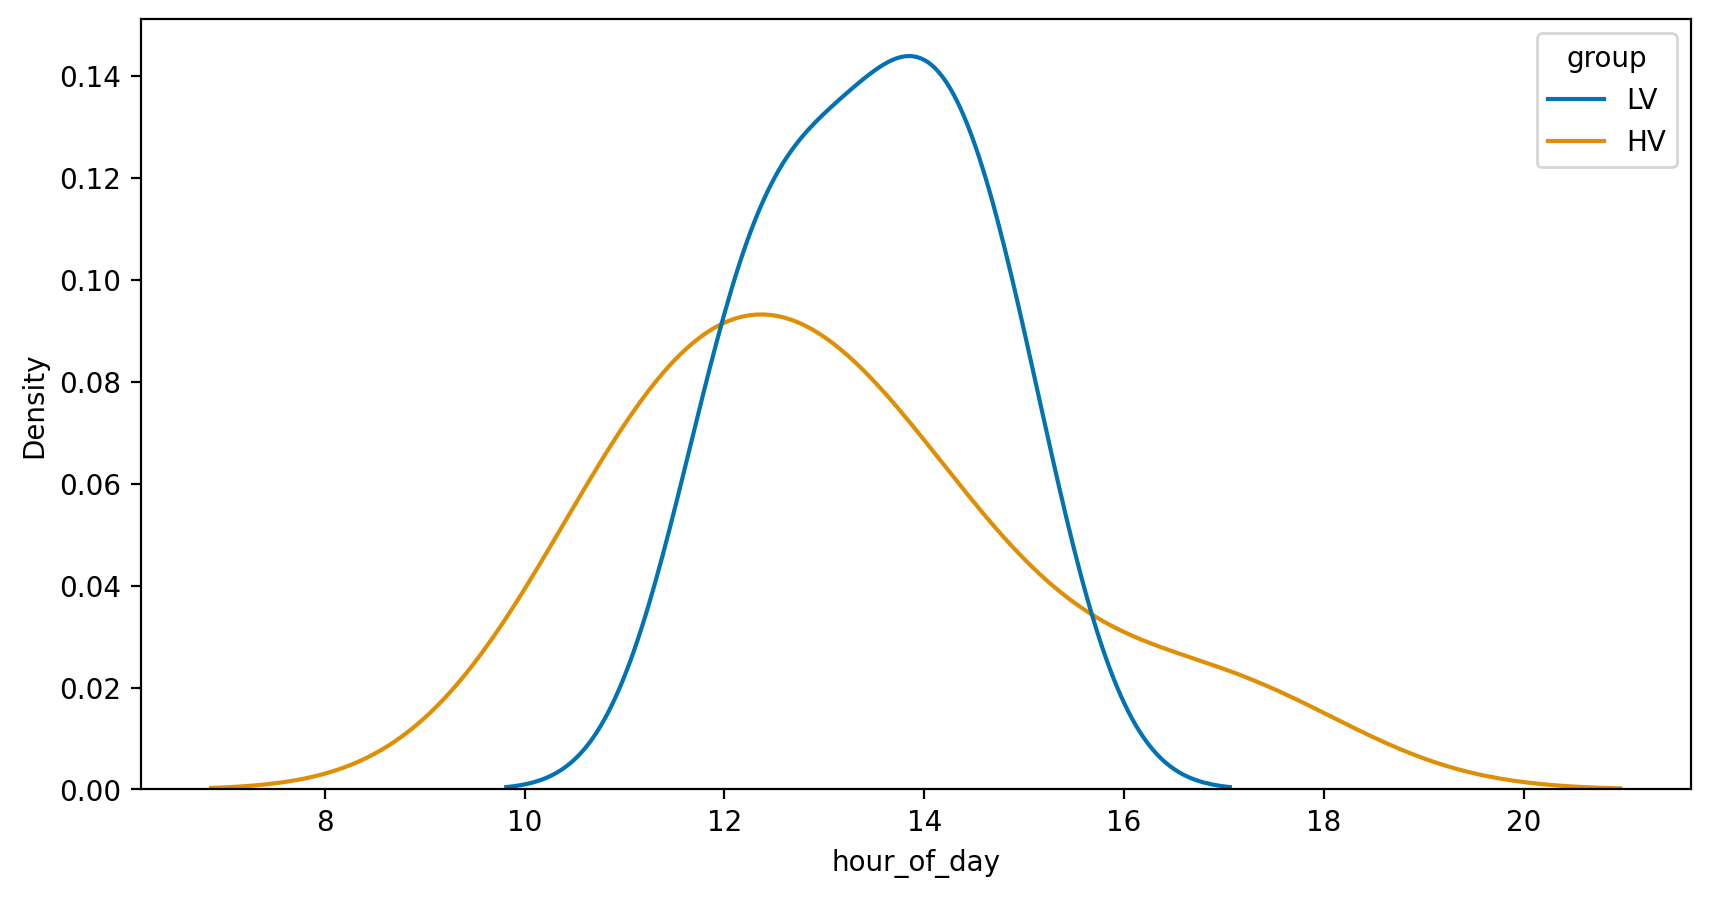

In [373]:
data_hour_of_day = scores.groupby(['user_id', 'data', 'nr_points']).mean().query('data == "freemove" and nr_points==10').copy()
data_hour_of_day.loc[data_hour_of_day.fscore_user_mean >= data_hour_of_day.fscore_user_mean.quantile(0.8), 'group'] = "HV"
data_hour_of_day.loc[data_hour_of_day.fscore_user_mean <= data_hour_of_day.fscore_user_mean.quantile(0.2),'group'] = "LV"


sns.kdeplot(data=data_hour_of_day, x="hour_of_day", hue="group")


<Axes: xlabel='hour_of_day', ylabel='Density'>

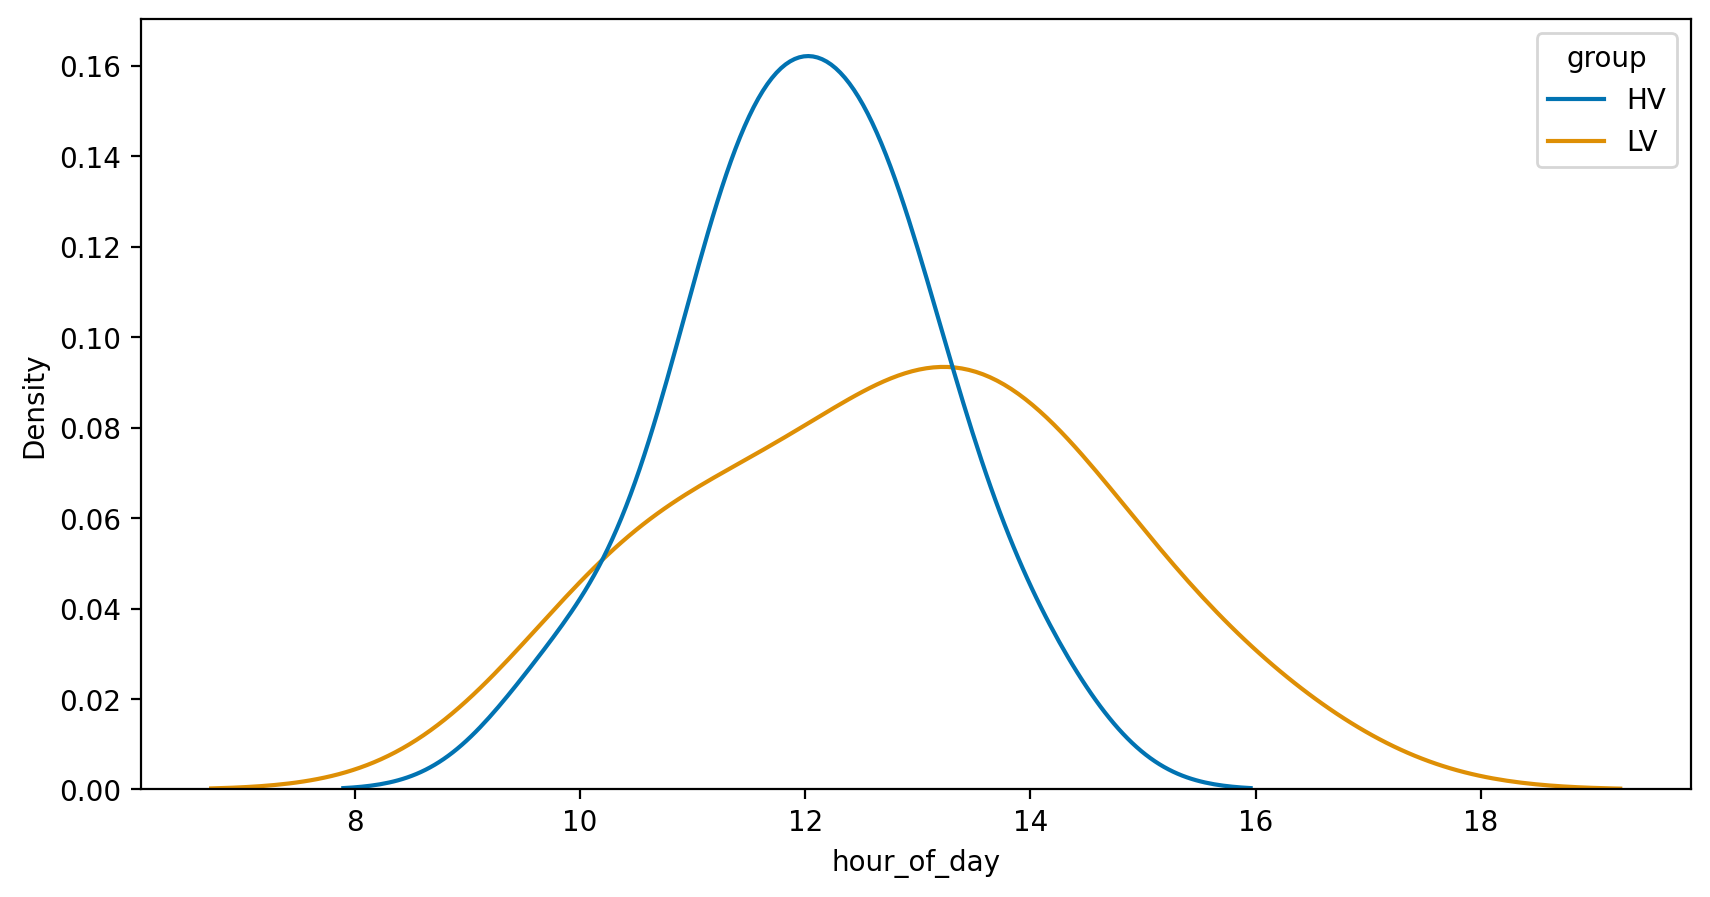

In [372]:
data_hour_of_day = scores.groupby(['user_id', 'data', 'nr_points']).mean().query('data == "geolife" and nr_points==10').copy()
data_hour_of_day.loc[data_hour_of_day.fscore_user_mean >= data_hour_of_day.fscore_user_mean.quantile(0.8), 'group'] = "HV"
data_hour_of_day.loc[data_hour_of_day.fscore_user_mean <= data_hour_of_day.fscore_user_mean.quantile(0.2),'group'] = "LV"


sns.kdeplot(data=data_hour_of_day, x="hour_of_day", hue="group")
